This notebook analyzes aviation accident data to identify aircraft damage patterns and overall risk.
The goal is to identify which aircraft have the lowest risk for the company to start this new company.

In [4]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





In [5]:
#load the dataset
aviation_df = pd.read_csv("AviationData.csv", encoding='latin1')

# Data understanding

In [19]:
#Showing key columns which is important for analysis of this project.

aviation_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

# Data cleaning

In [27]:

#Keep only airplane accidents
aviation_df = aviation_df[aviation_df["Aircraft.Category"] == "Airplane"]


In [28]:
# Look at the first few rows
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.4453,-70.7583,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983


In [29]:
#keep only US accidents
aviation_df = aviation_df[aviation_df["Country"] == "United States"]

In [30]:
#Rows with missing aircraft make or model
aviation_df = aviation_df.dropna(subset=["Make", "Model"])

In [24]:
#Rows with missing value
aviation_df = aviation_df.dropna(subset=["Make", "Injury.Severity"])

#  Accidents by Aircraft Manufacturer

In [6]:
#Count accidents by manufacturer
accidents_by_make = aviation_df["Make"].value_counts().head(10)

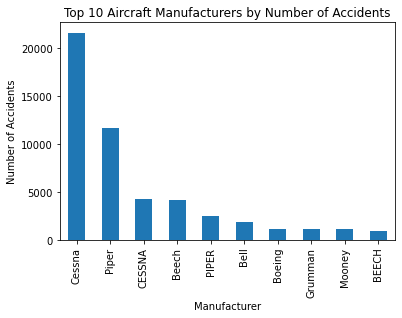

In [5]:
#Plot the data
accidents_by_make.plot(kind="bar", title="Top 10 Aircraft Manufacturers by Number of Accidents")
plt.xlabel("Manufacturer")
plt.ylabel("Number of Accidents")
plt.show()

# Fatal Accidents by Aircraft Model

In [7]:
#Create a fatal accident column
aviation_df["Fatal_Accident"] = aviation_df["Total.Fatal.Injuries"] > 0

In [8]:
#Calculate fatal accident rate by model
fatal_rate = aviation_df.groupby("Model")["Fatal_Accident"].mean()


In [8]:
#Show lowest fatality rates
fatal_rate.sort_values().head(10)

Model
&GCBC             0.0
KA-8B             0.0
KA-6-CR           0.0
K8B               0.0
K7                0.0
K600-3            0.0
K.R.1             0.0
K-8B              0.0
K-600 (HH-43B)    0.0
TU206D            0.0
Name: Fatal_Accident, dtype: float64

Some aircraft models have much lower fatal accident rates, making them safer choices.

# Accidents Over Time

In [9]:
#Convert date column to datetime
aviation_df["Event.Date"] = pd.to_datetime(aviation_df["Event.Date"])


In [10]:
#Extract year
aviation_df["Year"] = aviation_df["Event.Date"].dt.year

In [11]:
#Count accidents per year
accidents_per_year = aviation_df.groupby("Year").size()

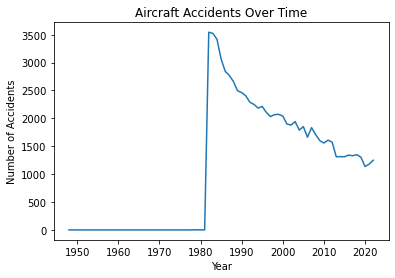

In [14]:
#Plot trend
accidents_per_year.plot(title="Aircraft Accidents Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.show()


It shows
Aircraft safety has improved over time, especially in recent years.

# Final Business Recommendations 

Prioritize buying aircraft with low accident occurance.

Opt for manufacturers with reqularly reduced accidents
This helps in reducing cost for maintenance and insurance.

Target on latest aircraft designs
latest aircraft shows safety has improved over time